In [61]:
import numpy as np 
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
datadiabetes = pd.read_csv('diabetes.csv')
datadiabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
datadiabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
datadiabetes.mean()

Pregnancies                   3.70350
Glucose                     121.18250
BloodPressure                69.14550
SkinThickness                20.93500
Insulin                      80.25400
BMI                          32.19300
DiabetesPedigreeFunction      0.47093
Age                          33.09050
Outcome                       0.34200
dtype: float64

In [13]:
datadiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


les variables explicatives :Pregnancies  Glucose  BloodPressure SkinThickness Insulin   BMI   DiabetesPedigreeFunction  
les variables a expliquer:  Outcome

In [14]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
# create a synthetic dataset
#X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X=datadiabetes.iloc[:, 0:-1]
Y=datadiabetes['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)



#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0,test_size=0.3)
#print (X_train.shape, Y_train.shape)
#print (X_test.shape, Y_test.shape)

# instantiate a model and fit it to the training set
#logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
#print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))


(1400, 8) (1400,)
(600, 8) (600,)


In [51]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn_15 = neighbors.KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train, Y_train)
y_pred_15 = knn_15.predict(X_test)

print('Model accuracy score with k=15 : ',accuracy_score(Y_test, y_pred_15))


Model accuracy score with k=15 :  0.775


In [53]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn_6 = neighbors.KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train, Y_train)
y_pred_6 = knn_6.predict(X_test)

print('Model accuracy score with k=6 : ',accuracy_score(Y_test, y_pred_6))

Model accuracy score with k=6 :  0.7983333333333333


In [54]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn_4 = neighbors.KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train, Y_train)
y_pred_4 = knn_4.predict(X_test)

print('Model accuracy score with k=4 : ',accuracy_score(Y_test, y_pred_4))

Model accuracy score with k=4 :  0.8133333333333334


In [58]:
from sklearn.metrics import classification_report,confusion_matrix
print (confusion_matrix(Y_test,y_pred_4))
print (classification_report(Y_test,y_pred_4))

[[369  33]
 [ 79 119]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       402
           1       0.78      0.60      0.68       198

    accuracy                           0.81       600
   macro avg       0.80      0.76      0.77       600
weighted avg       0.81      0.81      0.81       600



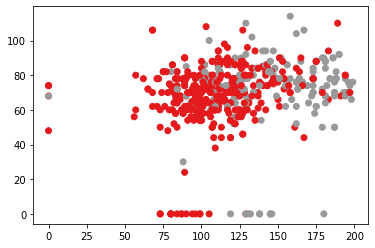

In [75]:
%matplotlib inline
plt.scatter(X_test.iloc[:,1],X_test.iloc[:,2],c=Y_test,cmap=plt.cm.Set1)


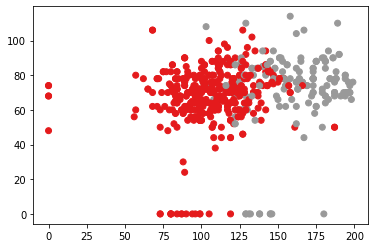

In [74]:
plt.scatter(X_test.iloc[:,1],X_test.iloc[:,2],c=y_pred_15,cmap=plt.cm.Set1)


Maximum accuracy:- 0.9516666666666667 at K = 0


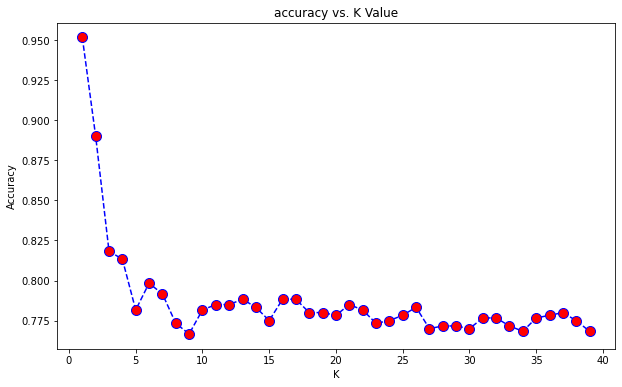

In [76]:
acc = []

from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

donc la meilleur valeur de K est: 6

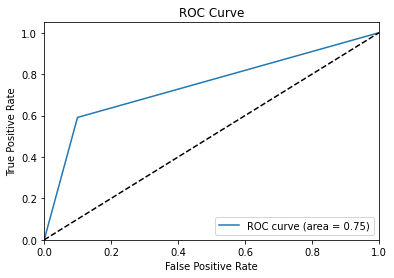

In [104]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(Y_test,y_pred_6)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# C- Classification : Arbre de decision

In [89]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini",min_samples_split=2,min_samples_leaf=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7783333333333333


In [91]:
print (confusion_matrix(Y_test,y_pred))
print (classification_report(Y_test,y_pred))

[[374  28]
 [105  93]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       402
           1       0.77      0.47      0.58       198

    accuracy                           0.78       600
   macro avg       0.77      0.70      0.72       600
weighted avg       0.78      0.78      0.76       600



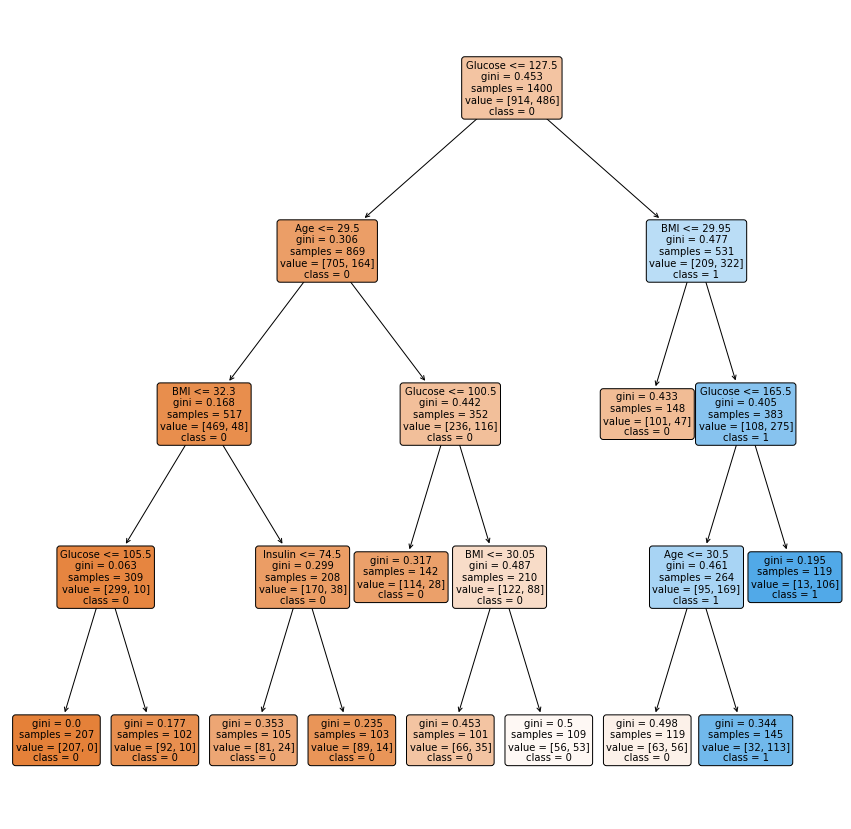

In [90]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt
feature_names = datadiabetes.columns[:8]
target_names = datadiabetes['Outcome'].unique().tolist()
plt.figure(figsize=(15,15))
plot_tree(clf ,feature_names = feature_names,class_names=(['0','1']),filled=True,rounded=True,fontsize=10)
plt.savefig('clf.png')
plt.show()

# SVM

In [95]:
# Fit du  Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

#Prediction sur le Test set
y_pred = classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.775


In [94]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       402
           1       0.68      0.61      0.64       198

    accuracy                           0.78       600
   macro avg       0.75      0.73      0.74       600
weighted avg       0.77      0.78      0.77       600



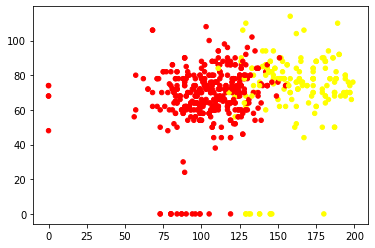

In [103]:
plt.scatter(X_test.iloc[:,1],X_test.iloc[:,2],c=y_pred,s=20,cmap='autumn')

In [112]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
sorted(clf.cv_results_.keys())


KeyboardInterrupt: 